![Universidad Central](https://www.ucentral.edu.co/sites/default/files/inline-images/identificadores-Centrados_en_ti_logo-h.png)

**Segmentación de clientes credito vehiculo**

**Marketing Analytics** <br>

Profesor: Hugo Alexander Martinez <br>
Facultad de Ingeniería y Ciencias Básicas <br>
Universidad Central <br>

Daniel Mauricio Cardenas<br>


# Metodologia de mineria de Datos - CRISP DM

## Comprensión del negocio.

- **Contexto**

Según Segura, F. E. P., y Ayala, J. C. P. (2005), el crédito para vehículos en Colombia se originó en la década de 1970, impulsado principalmente por la creación de ensambladoras que generaron empleo en sectores populares. Este desarrollo contribuyó al crecimiento económico y a la creciente necesidad de adquirir vehículos. Las entidades financieras vieron en esta situación una oportunidad de negocio debido a la alta demanda, ofreciendo créditos caracterizados por su alto valor, tasas de interés elevadas y garantías respaldadas por el mismo activo, además de contar con uno o varios codeudores. Con el tiempo, los bancos comenzaron a crear líneas de crédito especializadas para este sector.

Para 2024, la oferta de créditos para la adquisición de vehículos en Colombia es bastante amplia, y las tasas de interés varían según el tipo de vehículo, ya sea nuevo o usado, así como si es híbrido, eléctrico o de combustión fósil.

![Tasas de interes vehiculos](https://img.lalr.co/cms/2024/04/08165245/web_900_finanzas_autos_p21.jpg) <br>
[Fuente](https://www.larepublica.co/finanzas/estas-son-las-tasas-de-interes-que-ofrecen-las-entidades-para-los-creditos-de-vehiculos-3836450)

La financiación puede alcanzar hasta el 100% del valor del vehículo, con un plazo máximo de hasta 7 años (84 meses). Actualmente, Bancolombia ofrece la tasa más baja del mercado para la adquisición de vehículos eléctricos, con un 14.71% E.A., seguida de Davivienda con un 15.12% E.A. En términos generales, las tasas en el mercado rondan un promedio del 17% E.A

De acuerdo con el DANE, en el primer trimestre de 

- **Objetivos del negocio**





## Entendimiento de los datos

A continuación se realiza el analisis exploratorio de los datos, de acuerdo con el cuestionario **Crédito Vehículo - Potenciales**

In [1]:
from utils import *

In [2]:
#Cargar el dataset
url = "https://github.com/LordOnion88/MAD/raw/refs/heads/main/Marketing%20Analytics/Clustering/MAVEHICULO%20POTENCIALF.xlsx"

data = pd.read_excel(url, sheet_name='TEXTOS')
data.head(5)


,REGISTRO,CIUDAD,F1,F2,F6,F7,P1_1,P1_2,P1_3,P2,...,P64_2,P64A_OTRO,P64B_OTRO,P64C_OTRO,P64D_OTRO,P64E_OTRO,P64F_OTRO,D1,D2,D3
0,71,Bogotá,Si,Si,Mayor 60 años,Estrato Medio (3),-,NaN,NaN,-,...,NaN,-,-,-,-,-,-,Masculino,Independiente,Primaria completa
1,68,Bogotá,No,Si,25a 39 años,Estrato Medio (3),Mayor confort para transportarse / transportar...,NaN,NaN,Con financiamiento,...,NaN,-,-,-,-,-,-,Femenino,Empleado tiempo completo,Universidad incompleta
2,75,Bogotá,Si,Si,25a 39 años,Estrato Medio Típico (4),-,NaN,NaN,-,...,NaN,-,-,-,-,-,-,Femenino,Empleado tiempo completo,Universidad completa
3,77,Bogotá,No,Si,25a 39 años,Estrato Medio (3),Por superación personal,NaN,NaN,Con recursos propios,...,NaN,-,-,-,-,-,-,Masculino,Empleado tiempo completo,Técnico / tecnólogo
4,76,Bogotá,Si,Si,40 a 60 años,Estrato Medio (3),-,NaN,NaN,-,...,NaN,-,-,-,-,-,-,Masculino,Empleado tiempo completo,Postgrado


In [3]:
columnasAED = ['CIUDAD', 'F6','F7','D1','D2','D3']

data_AED = data.copy()
data_AED = data_AED[columnasAED]
data_AED = data_AED.rename(columns={'CIUDAD':'Ciudad','F6':'Rango de edad','F7':'Estrato','D1':'Genero','D2':'Ocupación','D3':'Nivel de estudios'})
data_AED.head()

,Ciudad,Rango de edad,Estrato,Genero,Ocupación,Nivel de estudios
0,Bogotá,Mayor 60 años,Estrato Medio (3),Masculino,Independiente,Primaria completa
1,Bogotá,25a 39 años,Estrato Medio (3),Femenino,Empleado tiempo completo,Universidad incompleta
2,Bogotá,25a 39 años,Estrato Medio Típico (4),Femenino,Empleado tiempo completo,Universidad completa
3,Bogotá,25a 39 años,Estrato Medio (3),Masculino,Empleado tiempo completo,Técnico / tecnólogo
4,Bogotá,40 a 60 años,Estrato Medio (3),Masculino,Empleado tiempo completo,Postgrado


In [4]:
data_AED.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Ciudad             125 non-null    object
 1   Rango de edad      125 non-null    object
 2   Estrato            125 non-null    object
 3   Genero             125 non-null    object
 4   Ocupación          125 non-null    object
 5   Nivel de estudios  125 non-null    object
dtypes: object(6)
memory usage: 6.0+ KB


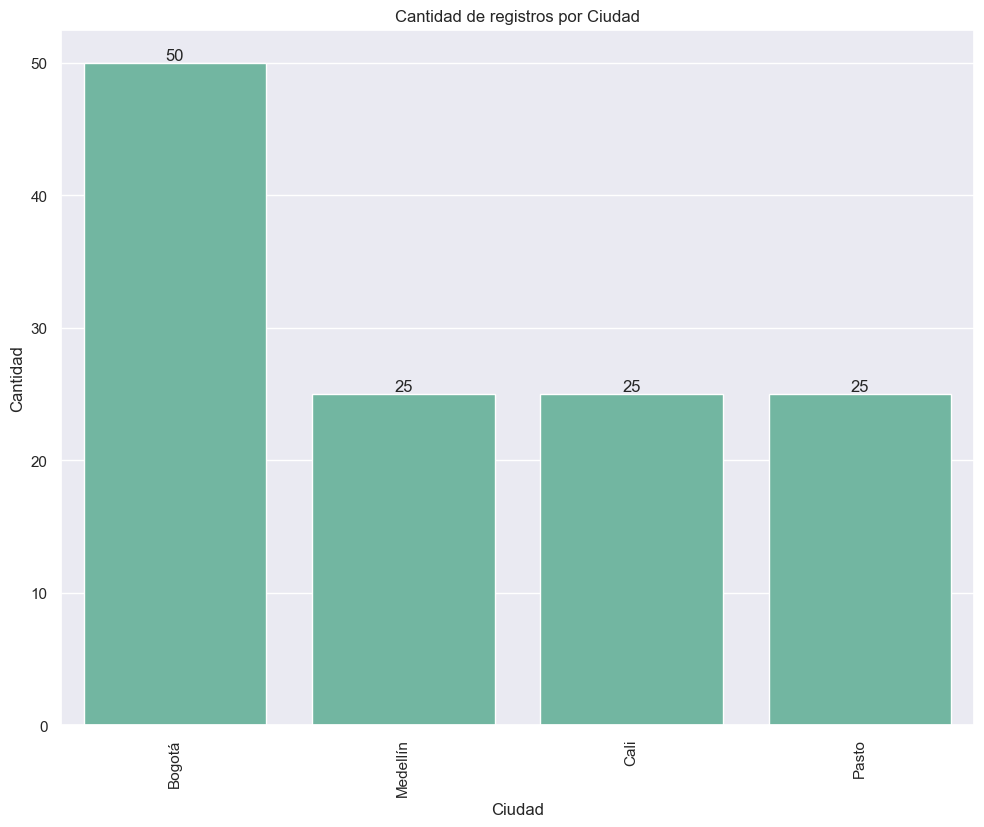

In [5]:
Graficar_categoricas('Ciudad',data_AED)

Describiendo la población que participo en la encuesta,podemos decir que se concentró en Bogotá ya que tiene el 40% de participación; para las demas ciudades tienen una participación del 20% respectivamente, por lo que podemos concluir que la campaña se debe enfocar en mayor medida a los clientes que se encuentren en Bogotá.

<Figure size 1000x800 with 0 Axes>

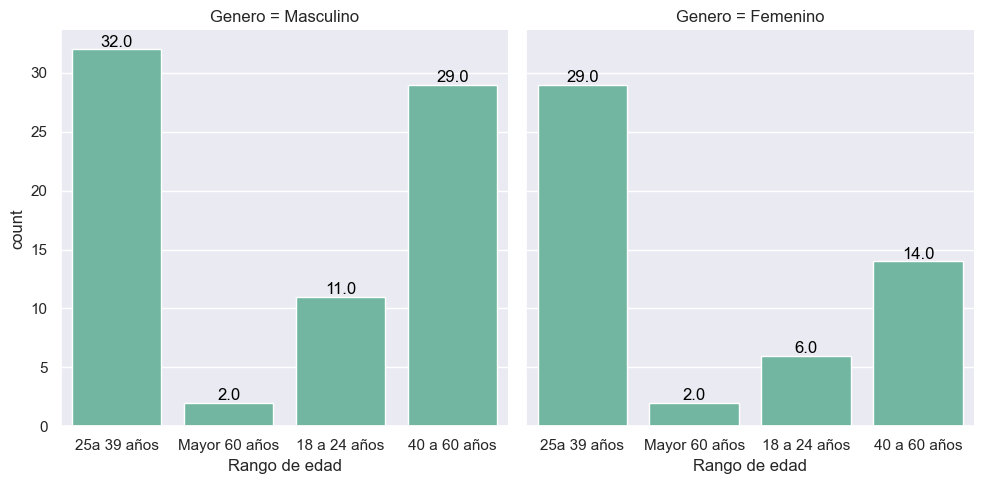

 Masculino: 74
 Femenino: 51


In [6]:
plt.figure(figsize=(10,8))
g = sns.FacetGrid(data_AED,col='Genero', margin_titles=True,height=5)
g.map(sns.countplot,'Rango de edad', order = {'18 a 24 años','25a 39 años','40 a 60 años','Mayor 60 años'})
for ax in g.axes.flat:
    # Añadir texto a cada barra
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=12, color='black', 
                    xytext=(0, 5), textcoords='offset points')

g.tight_layout()
plt.show()

c_genero = data_AED['Genero'].value_counts()
print(f" Masculino: {c_genero.get('Masculino',0)}")
print(f" Femenino: {c_genero.get('Femenino', 0)}")

De los encuestados, encontramos que 74 se identifican como masculinos, y 51 como femenino, en ambos casos el rango de edad que sobresale es el de 25 a 39 años, seguido del rango de 40 a 60 años; lo cual es acorde con la población activa en Colombia y que tiene mayor participación de operaciones de credito (González, A. B. 2023
), queda por demostrar si en este mismo grupo poblacional, es directamente proporcional con el interes en adquirir un vehiculo.

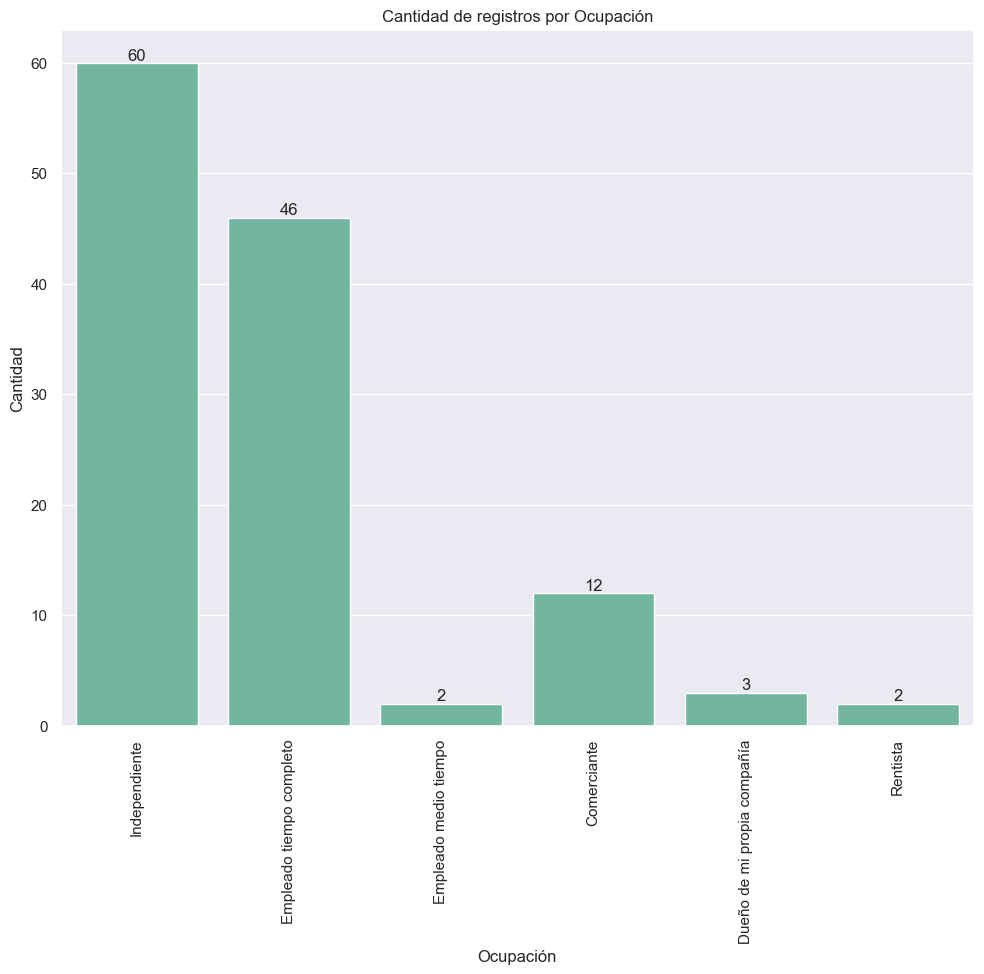

In [7]:
Graficar_categoricas('Ocupación',data_AED)

60 de los encuestados, son independientes, 46 son empleados a tiempo completo.

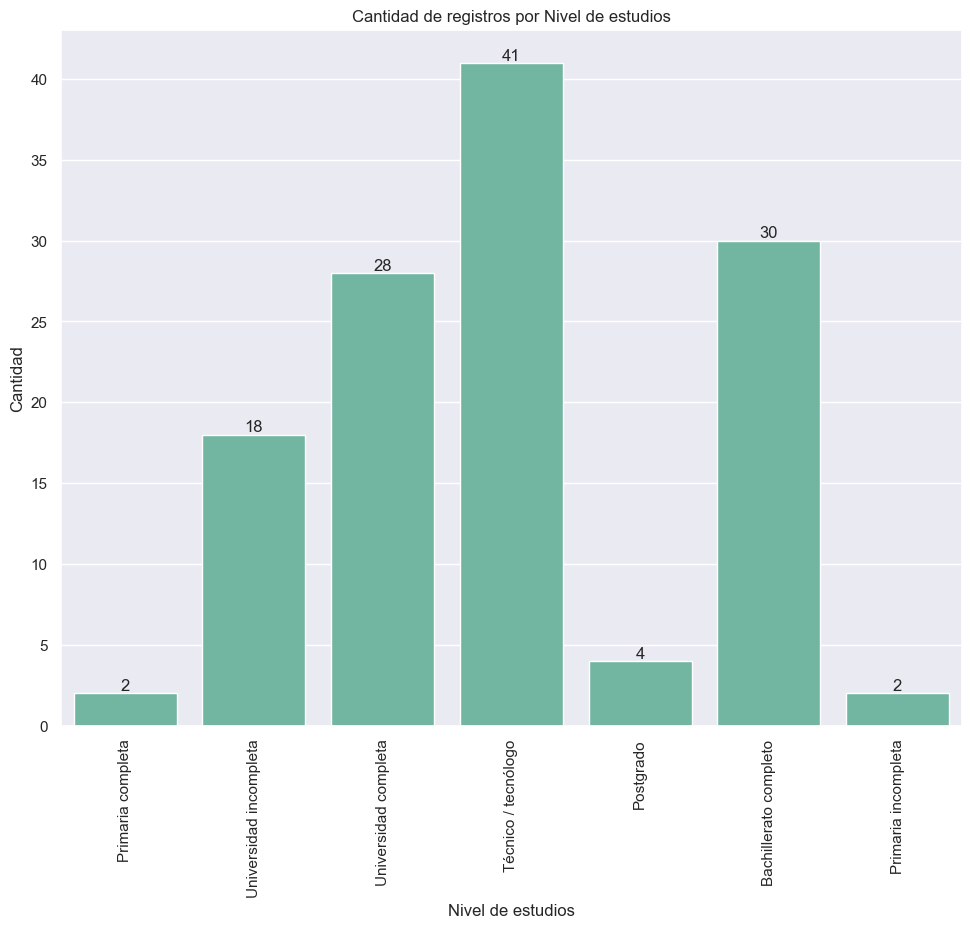

In [8]:
Graficar_categoricas('Nivel de estudios', data_AED)

En cuanto a nivel de estudios, la población se concentran en encuestados con un grado de técnico o tecnólogo.

## Preparación de la data

Preparamos la data con aquellas preguntas del cuestionario que nos permite describir o perfilar a cada uno de los clientes,estas preguntas son:

>18- A continuación le voy a leer una serie de frases que pueden reflejar su comportamiento. De acuerdo con la siguiente escala de 5 puntos,
donde 5 es Totalmente de acuerdo y 1 Totalmente en desacuerdo. ¿Qué tan de acuerdo o en desacuerdo se encuentra con las siguientes
frases...? Enc; leer escala, respuesta única por frase

>32- En una escala de 5 puntos donde 5 es muy fácil y 1 muy difícil, por lo que usted conoce, ¿Cómo percibe los siguientes procesos para
financiar un vehículo? Enc; leer escala, respuesta única por frase.

>42- A continuación le voy a leer una serie de frases que pueden reflejar su comportamiento y opinión frente al proceso de adquisición de un
vehículo. De acuerdo con la siguiente escala de 5 puntos, donde 5 es Totalmente de acuerdo y 1 Totalmente en desacuerdo. ¿Qué tan de
acuerdo o en desacuerdo se encuentra con las siguientes frases...? Enc; leer escala, respuesta única por frase

>43- A continuación le voy a leer una serie de frases que pueden reflejar su comportamiento y opinión frente al proceso de adquisición de un
crédito para la compra de vehículo. De acuerdo con la siguiente escala de 5 puntos, donde 5 es Totalmente de acuerdo y 1 Totalmente
en desacuerdo. ¿Qué tan de acuerdo o en desacuerdo se encuentra con las siguientes frases...? Enc; leer escala, respuesta única por
frase

>44- A continuación le voy a leer una serie de frases que pueden reflejar su comportamiento y opinión frente sistema financiero en general.
De acuerdo con la siguiente escala de 5 puntos, donde 5 es Totalmente de acuerdo y 1 Totalmente en desacuerdo. ¿Qué tan de acuerdo o
en desacuerdo se encuentra con las siguientes frases...? Enc; leer escala, respuesta única por frase.

In [9]:
data_Cl = pd.read_excel(url,sheet_name='CLUSTER')
data_Cl.head(10)

,REGISTRO,P18_1,P18_2,P18_3,P18_4,P18_5,P18_6,P18_7,P18_8,P18_9,...,P44_7,P44_8,P44_9,P44_10,P44_11,P44_12,P44_13,P44_14,P44_15,P44_16
0,71,5,5,5,1,5,5,5,1,1,...,5,1,5,1,1,5,3,5,5,5
1,68,5,5,4,3,4,5,4,4,5,...,2,2,1,1,1,1,1,1,1,1
2,75,4,4,5,5,5,5,5,4,4,...,5,5,4,5,5,5,5,4,4,4
3,77,4,4,4,4,4,3,4,4,4,...,4,2,4,4,4,2,2,2,2,4
4,76,5,5,5,5,4,4,5,5,5,...,5,5,5,5,5,5,5,5,5,4
5,60,5,4,5,4,4,5,5,5,4,...,5,1,2,2,1,1,1,4,4,4
6,57,4,5,2,5,5,5,4,4,5,...,3,4,4,4,4,4,4,4,4,4
7,62,4,4,4,4,4,4,4,4,3,...,4,4,4,4,4,3,2,4,3,4
8,67,5,5,5,4,5,5,5,5,4,...,5,5,2,1,2,4,3,4,5,5
9,65,5,5,5,5,5,5,5,4,4,...,2,2,3,2,3,3,3,3,3,3


In [10]:
data_Cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 67 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   REGISTRO  125 non-null    int64 
 1   P18_1     125 non-null    int64 
 2   P18_2     125 non-null    int64 
 3   P18_3     125 non-null    int64 
 4   P18_4     125 non-null    int64 
 5   P18_5     125 non-null    int64 
 6   P18_6     125 non-null    int64 
 7   P18_7     125 non-null    int64 
 8   P18_8     125 non-null    int64 
 9   P18_9     125 non-null    int64 
 10  P18_10    125 non-null    int64 
 11  P32_1     125 non-null    int64 
 12  P32_2     125 non-null    int64 
 13  P32_3     125 non-null    int64 
 14  P32_4     125 non-null    int64 
 15  P32_5     125 non-null    int64 
 16  P32_6     125 non-null    int64 
 17  P32_7     125 non-null    int64 
 18  P32_8     125 non-null    int64 
 19  P32_9     125 non-null    int64 
 20  P32_10    125 non-null    int64 
 21  P42_1     125 no

Identificamos que el dataset no tiene datos nulos, adicionalmente que la pregunta P43_19 no es int64, por lo tanto no es posible realizar el proceso de clustering, ahora bien, procedemos a validar la data y decido no tenerla en cuenta ya que solo aplica para un grupo pequeño de clientes que piensa en adquirir vehiculos productivos; tambien eliminamos la colmna Registro ya que no es un identificador unico por cada uno de los encuestados.

In [11]:
Columnas_drop = ['REGISTRO','P43_19']
data_Cl.drop(columns=Columnas_drop,inplace=True)
data_Cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   P18_1   125 non-null    int64
 1   P18_2   125 non-null    int64
 2   P18_3   125 non-null    int64
 3   P18_4   125 non-null    int64
 4   P18_5   125 non-null    int64
 5   P18_6   125 non-null    int64
 6   P18_7   125 non-null    int64
 7   P18_8   125 non-null    int64
 8   P18_9   125 non-null    int64
 9   P18_10  125 non-null    int64
 10  P32_1   125 non-null    int64
 11  P32_2   125 non-null    int64
 12  P32_3   125 non-null    int64
 13  P32_4   125 non-null    int64
 14  P32_5   125 non-null    int64
 15  P32_6   125 non-null    int64
 16  P32_7   125 non-null    int64
 17  P32_8   125 non-null    int64
 18  P32_9   125 non-null    int64
 19  P32_10  125 non-null    int64
 20  P42_1   125 non-null    int64
 21  P42_2   125 non-null    int64
 22  P42_3   125 non-null    int64
 23  P42_4   125 non

Ahora para evitar la coolinealidad, validamos la correlación  que se presenta en cada una de las preguntas y las correlaciones por encima de un 0.5 seran eliminadas del data set.

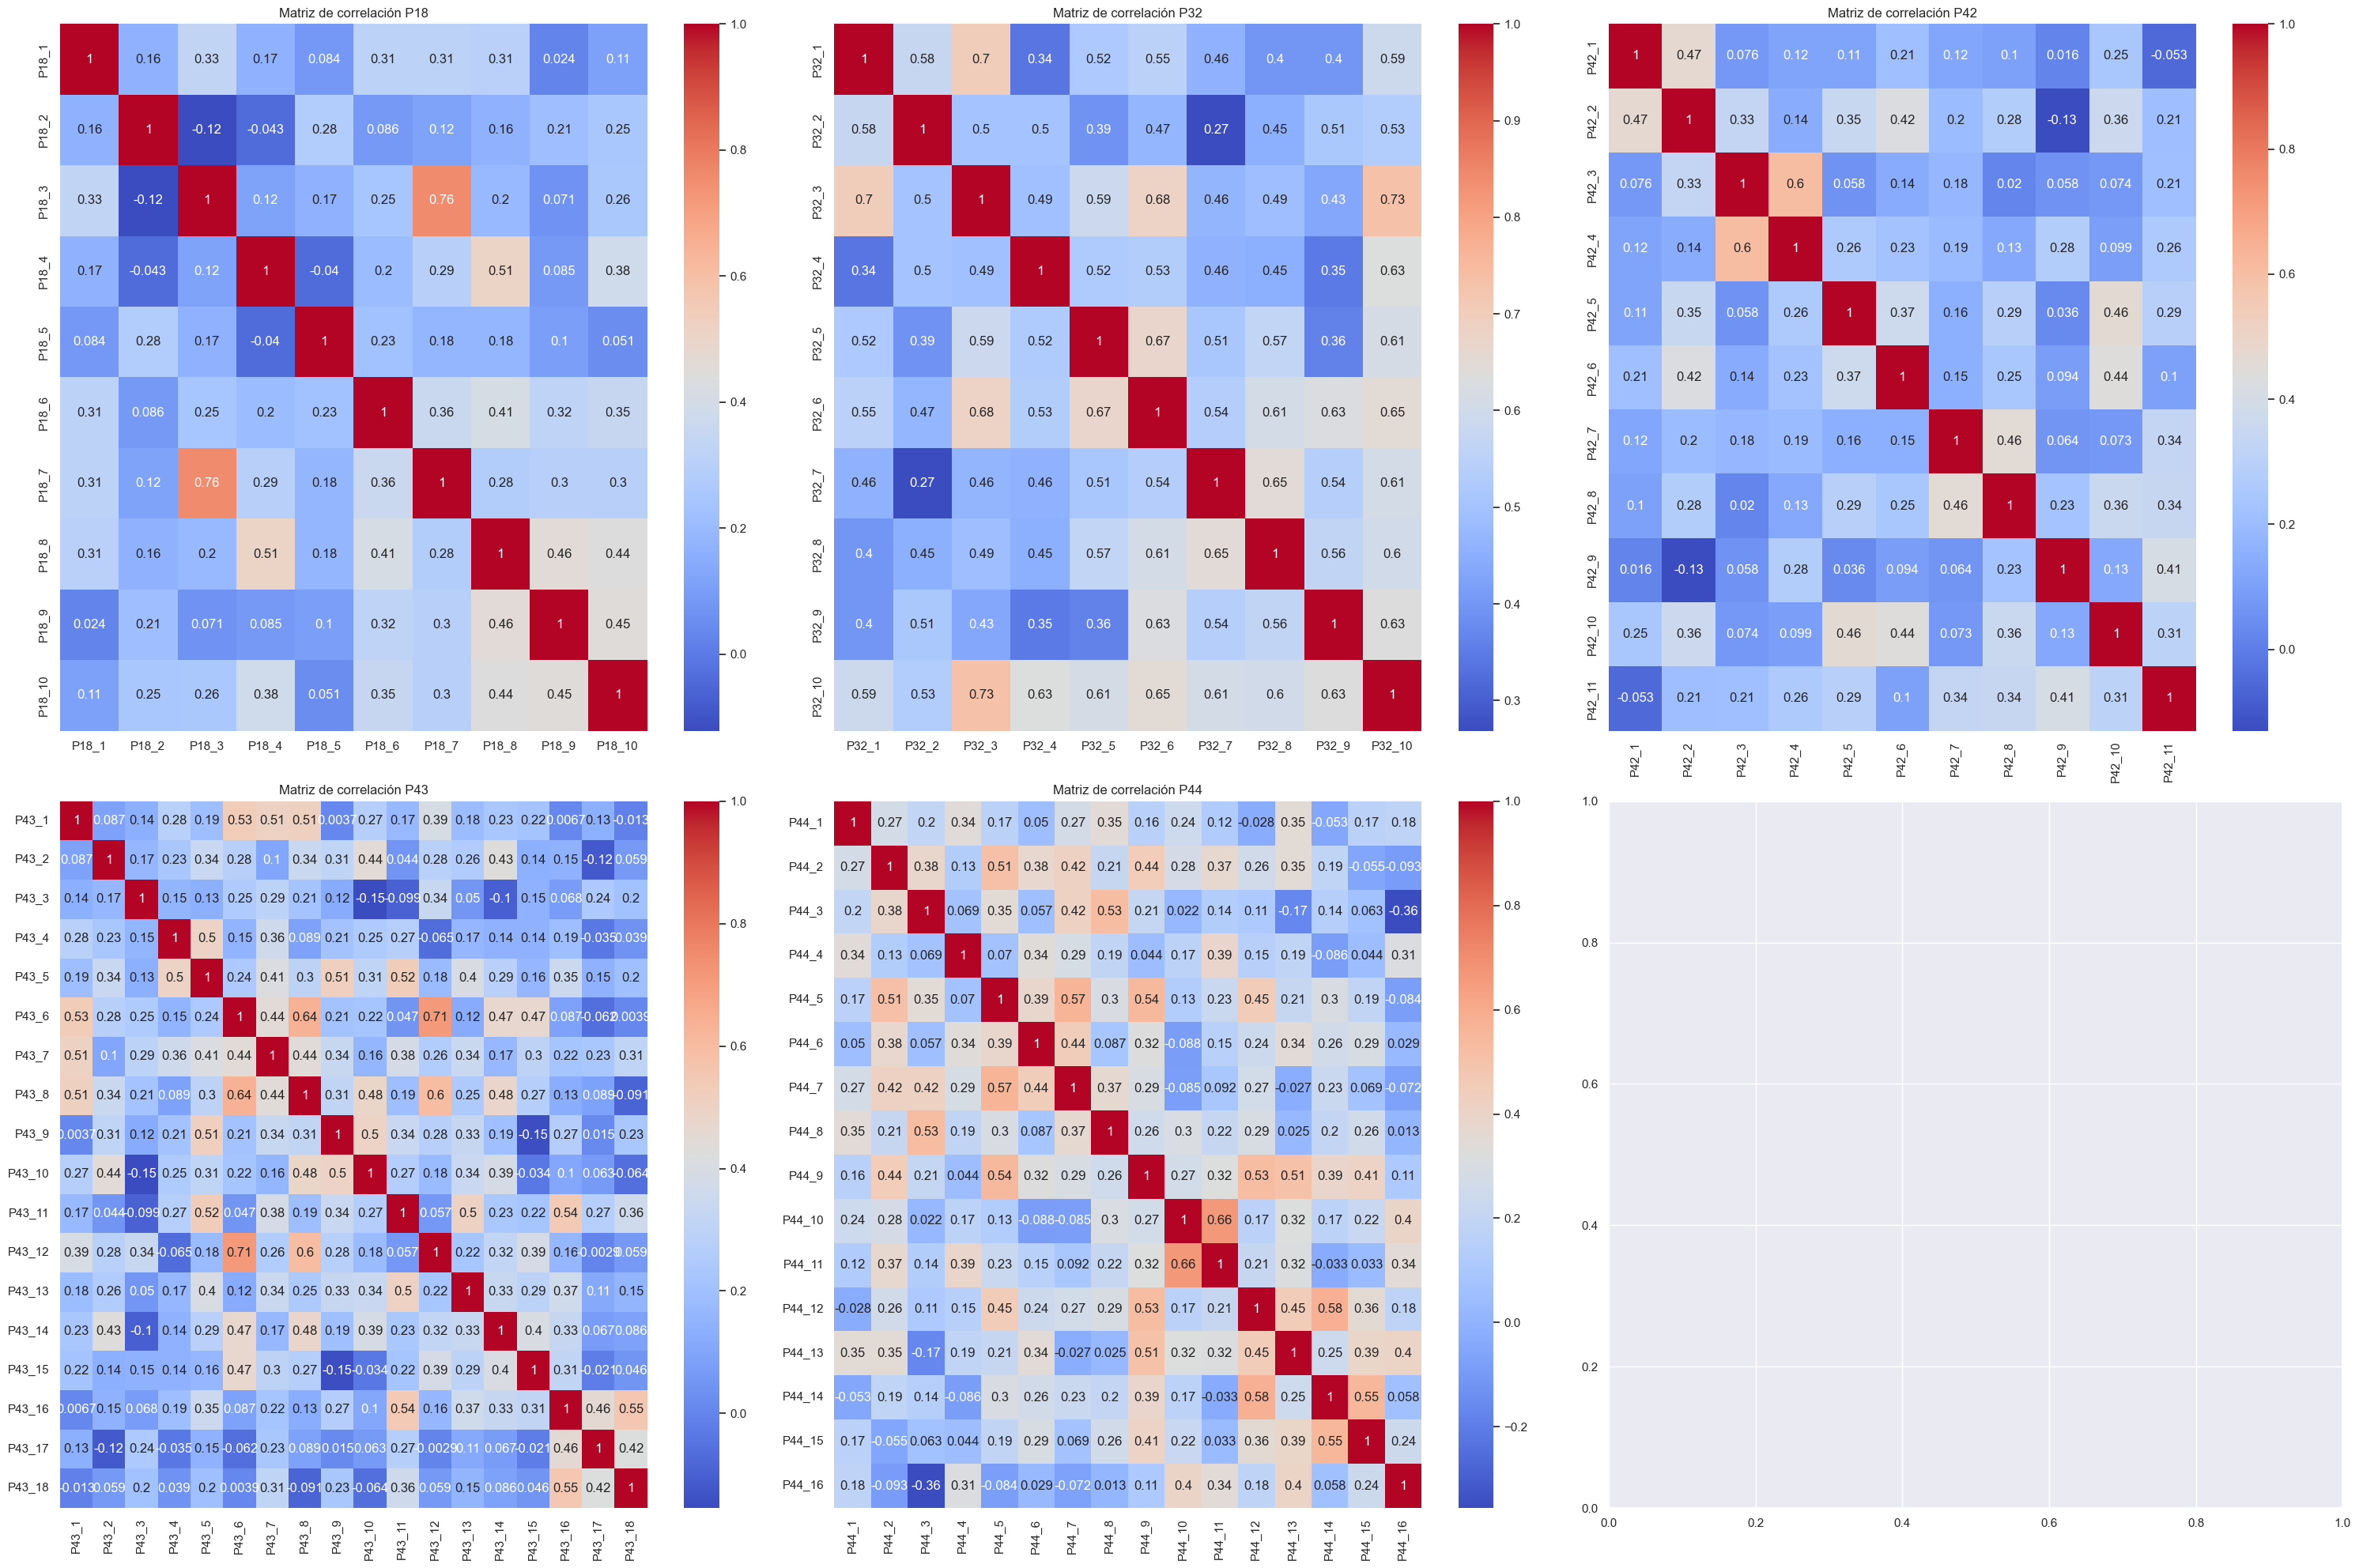

In [12]:
# Heatmap por grupo de preguntas

grupos_preguntas = {
    'P18': ['P18_1', 'P18_2', 'P18_3', 'P18_4', 'P18_5', 'P18_6', 'P18_7', 'P18_8', 'P18_9', 'P18_10'],
    'P32': ['P32_1', 'P32_2', 'P32_3', 'P32_4', 'P32_5', 'P32_6', 'P32_7', 'P32_8', 'P32_9', 'P32_10'],
    'P42': ['P42_1', 'P42_2', 'P42_3', 'P42_4', 'P42_5', 'P42_6', 'P42_7', 'P42_8', 'P42_9', 'P42_10', 'P42_11'],
    'P43': ['P43_1', 'P43_2', 'P43_3', 'P43_4', 'P43_5', 'P43_6', 'P43_7', 'P43_8', 'P43_9', 'P43_10', 'P43_11', 
            'P43_12', 'P43_13', 'P43_14', 'P43_15', 'P43_16', 'P43_17', 'P43_18'],
    'P44': ['P44_1', 'P44_2', 'P44_3', 'P44_4', 'P44_5', 'P44_6', 'P44_7', 'P44_8', 'P44_9', 'P44_10', 'P44_11', 
            'P44_12', 'P44_13', 'P44_14', 'P44_15', 'P44_16']
}

fig, axes = plt.subplots(2, 3, figsize=(30, 20))

for i, (grupo, columnas) in enumerate(grupos_preguntas.items()):
    correlacion = data_Cl[columnas].corr()
    ax = axes[i // 3, i % 3]
    Coolinealidad(correlacion, grupo, ax)

plt.tight_layout()
plt.show()


- Para la el grupo P_18, no se tendran en cuenta las columnas P18_7 y P18_8
- Para la el grupo P_32, no se tendran en cuenta las columnas P32_3, P32_5, P32_6, P32_8, P32_9 y P32_10
- Para la el grupo P_42, no se tendran en cuenta la columna P42_4
- Para la el grupo P_43, no se tendran en cuenta las columnas P43_6, P43_7, P43_8, P43_9, P43_11 y P43_18
- Para la el grupo P_44, no se tendran en cuenta las columnas P44_5, P44_8, P44_10, P44_12 y P44_15


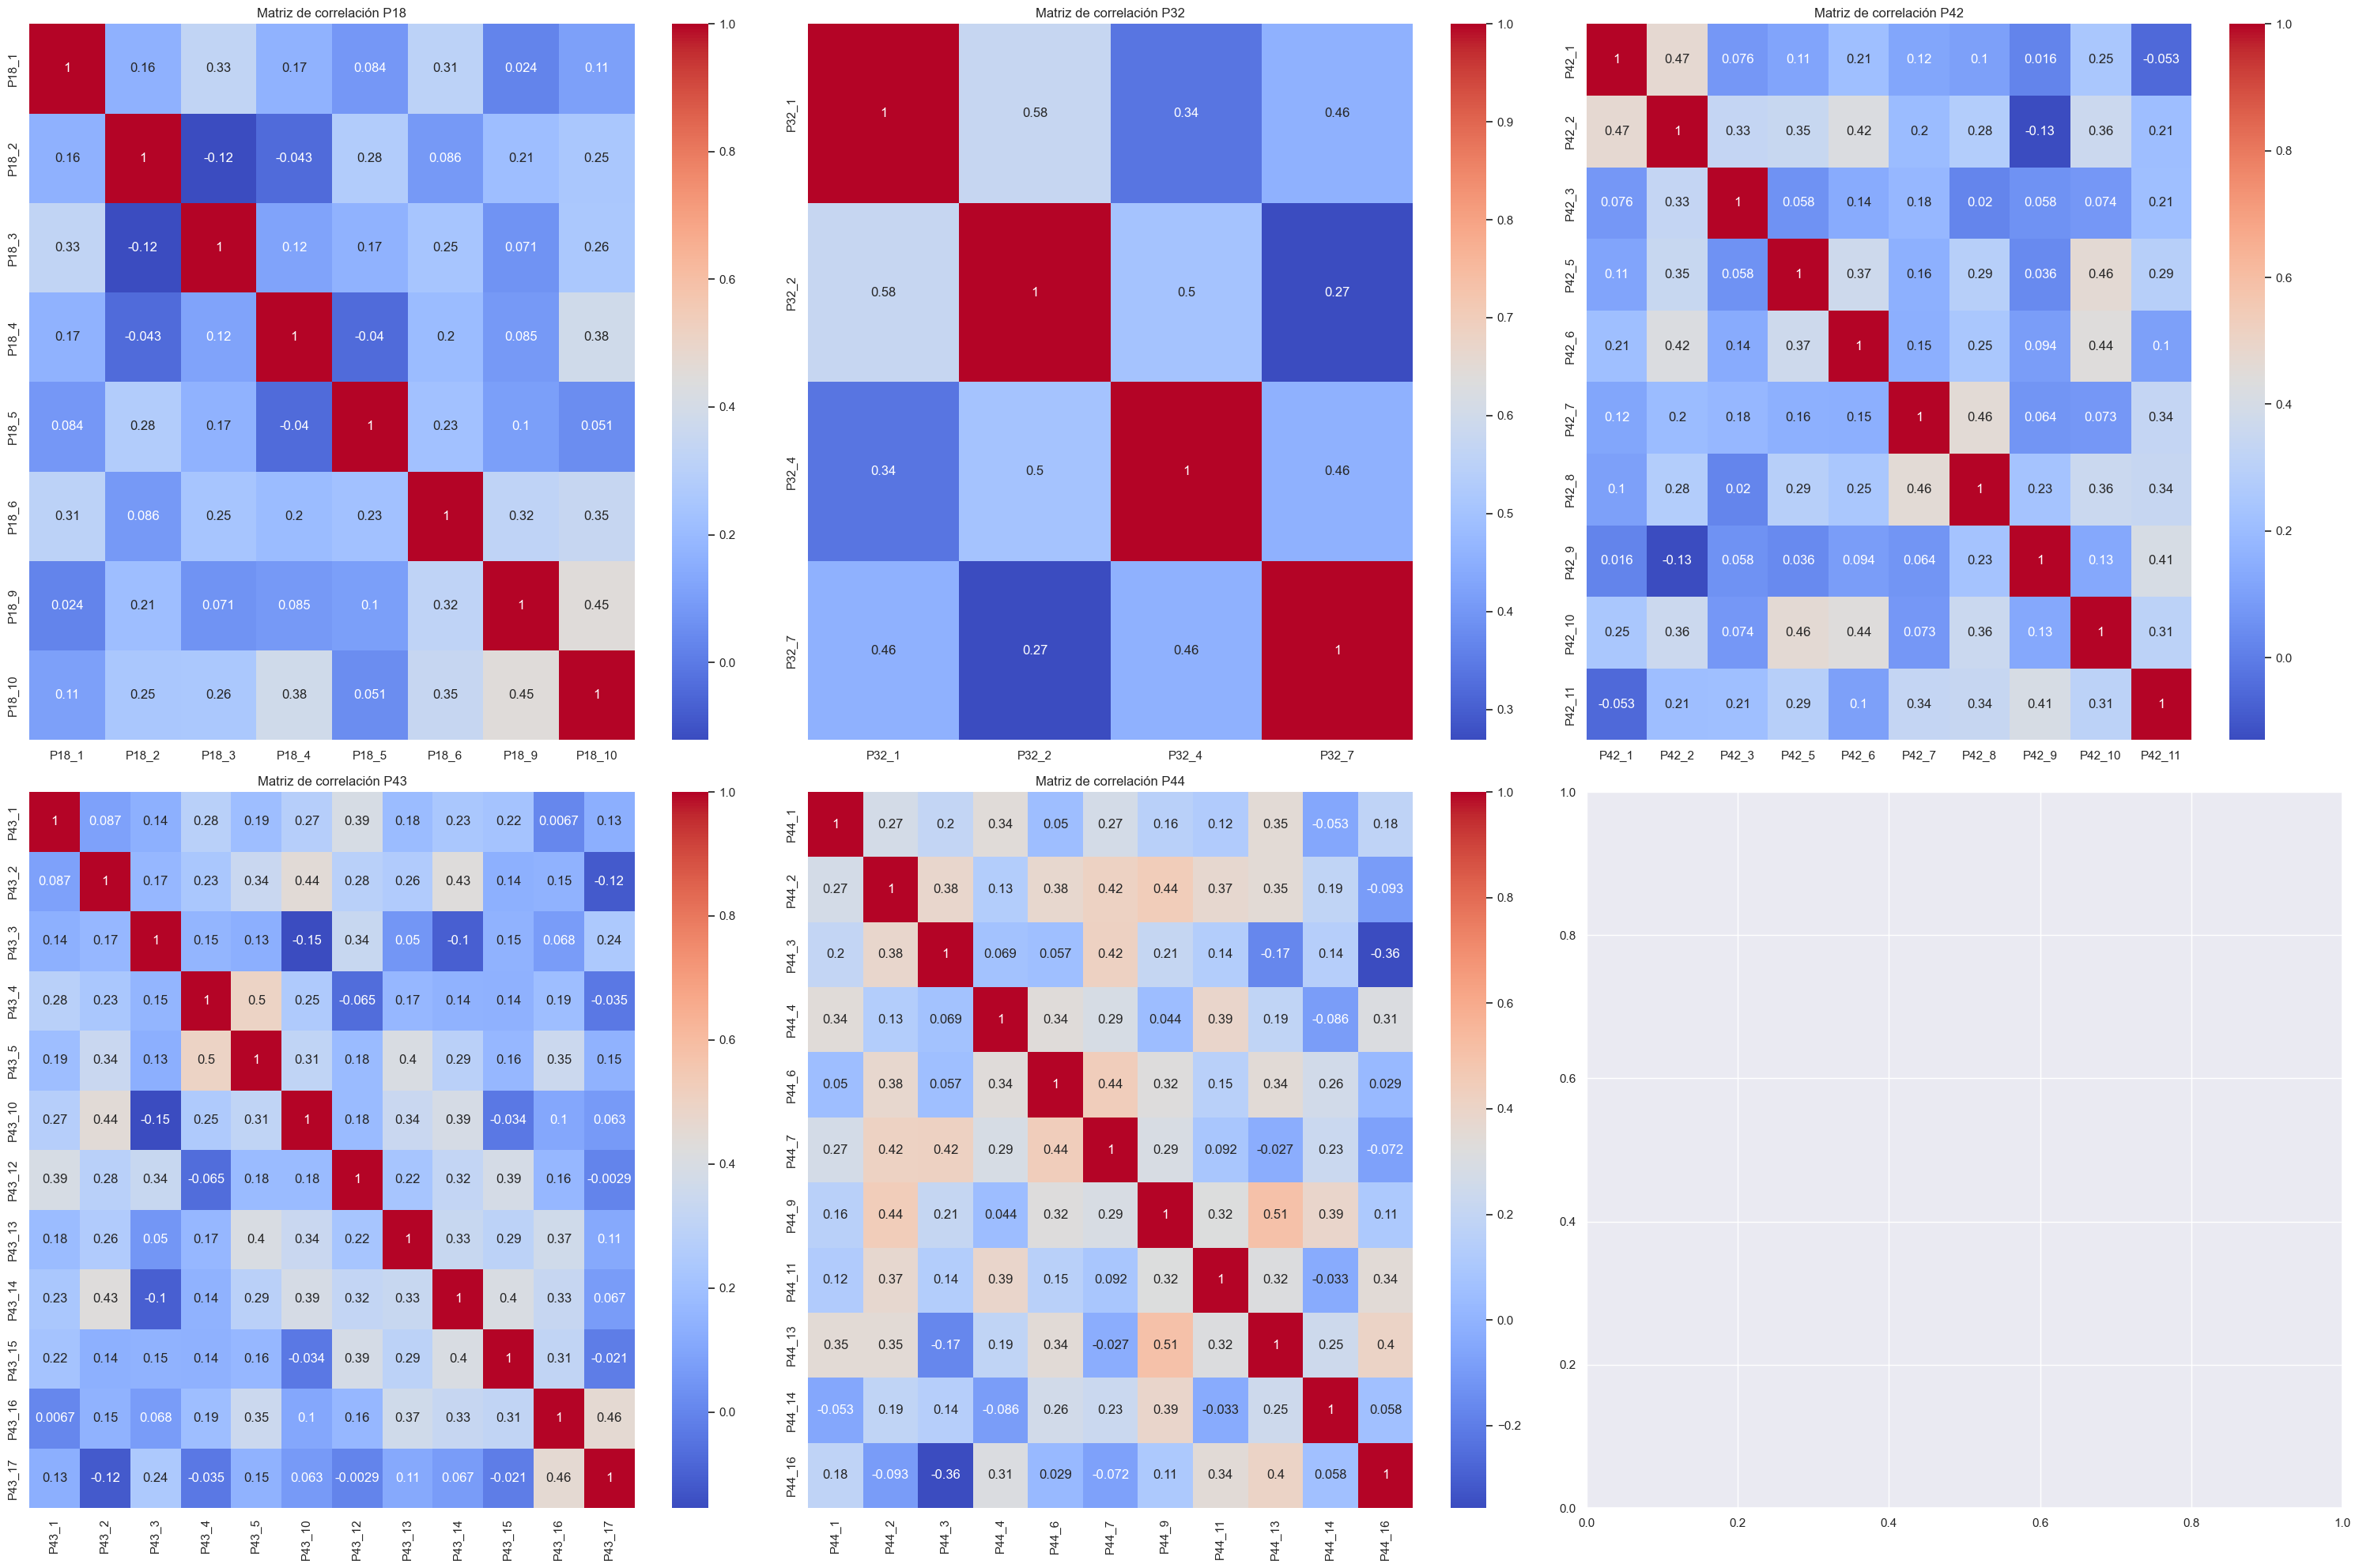

In [13]:
# Heatmap por grupo de preguntas ajustado

grupos_preguntas_aj = {
    'P18': ['P18_1', 'P18_2', 'P18_3', 'P18_4', 'P18_5', 'P18_6','P18_9', 'P18_10'],
    'P32': ['P32_1', 'P32_2', 'P32_4', 'P32_7'],
    'P42': ['P42_1', 'P42_2', 'P42_3', 'P42_5', 'P42_6', 'P42_7', 'P42_8', 'P42_9', 'P42_10', 'P42_11'],
    'P43': ['P43_1', 'P43_2', 'P43_3', 'P43_4', 'P43_5', 'P43_10', 'P43_12', 'P43_13', 'P43_14', 'P43_15', 'P43_16', 'P43_17'],
    'P44': ['P44_1', 'P44_2', 'P44_3', 'P44_4', 'P44_6', 'P44_7', 'P44_9', 'P44_11', 'P44_13', 'P44_14', 'P44_16']
}

fig, axes = plt.subplots(2, 3, figsize=(30, 20))

for i, (grupo, columnas) in enumerate(grupos_preguntas_aj.items()):
    correlacion = data_Cl[columnas].corr()
    ax = axes[i // 3, i % 3]
    Coolinealidad(correlacion, grupo, ax)

plt.tight_layout()
plt.show()

In [14]:
#Ajustar el dataset para eliminar las columnas que tienen una correlación superior a 0.5

Columnas_aj = ['P18_1', 'P18_2', 'P18_3', 'P18_4', 'P18_5', 'P18_6','P18_9', 'P18_10',
               'P32_1', 'P32_2', 'P32_4', 'P32_7',
               'P42_1', 'P42_2', 'P42_3', 'P42_5', 'P42_6', 'P42_7', 'P42_8', 'P42_9', 'P42_10', 'P42_11',
               'P43_1', 'P43_2', 'P43_3', 'P43_4', 'P43_5', 'P43_10', 'P43_12', 'P43_13', 'P43_14', 'P43_15', 'P43_16', 'P43_17',
               'P44_1', 'P44_2', 'P44_3', 'P44_4', 'P44_6', 'P44_7', 'P44_9', 'P44_11', 'P44_13', 'P44_14', 'P44_16']

data_aj =data_Cl.copy()
data_aj = data_aj[Columnas_aj]
data_aj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   P18_1   125 non-null    int64
 1   P18_2   125 non-null    int64
 2   P18_3   125 non-null    int64
 3   P18_4   125 non-null    int64
 4   P18_5   125 non-null    int64
 5   P18_6   125 non-null    int64
 6   P18_9   125 non-null    int64
 7   P18_10  125 non-null    int64
 8   P32_1   125 non-null    int64
 9   P32_2   125 non-null    int64
 10  P32_4   125 non-null    int64
 11  P32_7   125 non-null    int64
 12  P42_1   125 non-null    int64
 13  P42_2   125 non-null    int64
 14  P42_3   125 non-null    int64
 15  P42_5   125 non-null    int64
 16  P42_6   125 non-null    int64
 17  P42_7   125 non-null    int64
 18  P42_8   125 non-null    int64
 19  P42_9   125 non-null    int64
 20  P42_10  125 non-null    int64
 21  P42_11  125 non-null    int64
 22  P43_1   125 non-null    int64
 23  P43_2   125 non

In [15]:
# Estandarización de los datos:
pd.reset_option('display.max_rows')
data_escalada = StandardScaler().fit_transform(data_aj)
data_esc= pd.DataFrame(data_escalada, index=data_aj.index)
data_esc.columns = data_esc.columns.astype(str)
data_esc

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1.009877,0.962675,0.630893,-2.219412,0.900885,0.943690,-1.916281,-1.890695,0.174998,0.071338,...,-2.728827,-2.718981,1.315587,1.262966,0.898361,1.296512,-1.581139,-0.111765,1.314338,1.411449
1,1.009877,0.962675,-0.802955,-0.572964,-1.110019,0.943690,1.505649,1.129585,0.174998,0.071338,...,-0.889995,-0.748705,-0.146176,-1.153423,-1.840544,-2.680519,-1.581139,-1.858097,-2.276749,-1.400203
2,-0.333045,-0.151532,0.630893,1.073484,0.900885,0.943690,0.650167,1.129585,1.016334,0.963058,...,0.948837,0.236433,1.315587,0.457503,0.898361,0.302254,1.293659,1.634566,0.416566,0.708536
3,-0.333045,-0.151532,-0.802955,0.250260,-1.110019,-0.650381,0.650167,0.374515,1.016334,0.071338,...,0.029421,0.236433,0.584705,-1.153423,-0.014607,0.302254,0.574960,-0.984931,-1.378977,0.708536
4,1.009877,0.962675,0.630893,1.073484,-1.110019,0.146655,1.505649,1.129585,0.174998,0.071338,...,0.948837,1.221571,1.315587,1.262966,0.898361,1.296512,1.293659,1.634566,1.314338,0.708536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1.009877,0.962675,0.630893,1.073484,0.900885,-2.244453,-0.205316,1.129585,1.016334,0.963058,...,0.948837,-0.748705,-0.146176,1.262966,0.898361,0.302254,-0.143740,-0.111765,-1.378977,-1.400203
121,1.009877,-0.151532,0.630893,-0.572964,0.900885,0.943690,0.650167,-0.380555,1.016334,0.071338,...,0.948837,0.236433,-0.146176,1.262966,0.898361,1.296512,-0.143740,0.761400,0.416566,0.005623
122,-0.333045,-0.151532,0.630893,-0.572964,-1.110019,-0.650381,-0.205316,-0.380555,0.174998,0.071338,...,0.029421,0.236433,-0.877058,-0.347960,-0.014607,0.302254,0.574960,-0.111765,0.416566,0.005623
123,-0.333045,-0.151532,-0.802955,-0.572964,-1.110019,-0.650381,-1.060798,-1.135625,0.174998,0.071338,...,0.029421,-0.748705,-1.607940,0.457503,0.898361,0.302254,-0.862439,-0.111765,0.416566,-0.697290


## Modelado

In [16]:
elbow_plot(data_aj,n=10,scaled_data=False)

In [17]:
k = 3
kmeans = KMeans(n_clusters=k,random_state=0)
cluster = kmeans.fit_predict(data_escalada)

data_esc['Cluster'] = cluster

data_esc

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,Cluster
0,1.009877,0.962675,0.630893,-2.219412,0.900885,0.943690,-1.916281,-1.890695,0.174998,0.071338,...,-2.718981,1.315587,1.262966,0.898361,1.296512,-1.581139,-0.111765,1.314338,1.411449,2
1,1.009877,0.962675,-0.802955,-0.572964,-1.110019,0.943690,1.505649,1.129585,0.174998,0.071338,...,-0.748705,-0.146176,-1.153423,-1.840544,-2.680519,-1.581139,-1.858097,-2.276749,-1.400203,1
2,-0.333045,-0.151532,0.630893,1.073484,0.900885,0.943690,0.650167,1.129585,1.016334,0.963058,...,0.236433,1.315587,0.457503,0.898361,0.302254,1.293659,1.634566,0.416566,0.708536,0
3,-0.333045,-0.151532,-0.802955,0.250260,-1.110019,-0.650381,0.650167,0.374515,1.016334,0.071338,...,0.236433,0.584705,-1.153423,-0.014607,0.302254,0.574960,-0.984931,-1.378977,0.708536,2
4,1.009877,0.962675,0.630893,1.073484,-1.110019,0.146655,1.505649,1.129585,0.174998,0.071338,...,1.221571,1.315587,1.262966,0.898361,1.296512,1.293659,1.634566,1.314338,0.708536,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1.009877,0.962675,0.630893,1.073484,0.900885,-2.244453,-0.205316,1.129585,1.016334,0.963058,...,-0.748705,-0.146176,1.262966,0.898361,0.302254,-0.143740,-0.111765,-1.378977,-1.400203,2
121,1.009877,-0.151532,0.630893,-0.572964,0.900885,0.943690,0.650167,-0.380555,1.016334,0.071338,...,0.236433,-0.146176,1.262966,0.898361,1.296512,-0.143740,0.761400,0.416566,0.005623,2
122,-0.333045,-0.151532,0.630893,-0.572964,-1.110019,-0.650381,-0.205316,-0.380555,0.174998,0.071338,...,0.236433,-0.877058,-0.347960,-0.014607,0.302254,0.574960,-0.111765,0.416566,0.005623,2
123,-0.333045,-0.151532,-0.802955,-0.572964,-1.110019,-0.650381,-1.060798,-1.135625,0.174998,0.071338,...,-0.748705,-1.607940,0.457503,0.898361,0.302254,-0.862439,-0.111765,0.416566,-0.697290,2


In [18]:
cluster_summary = data_esc.groupby('Cluster').mean()
print(cluster_summary)

                0         1         2         3         4         5         6  \
Cluster                                                                         
0        0.434339  0.103144  0.548959  0.556029  0.326341  0.260517  0.136877   
1       -0.109224  0.591273  0.152944 -0.847372  0.230584  0.545172  1.220488   
2       -0.178092 -0.137248 -0.269858 -0.119135 -0.181910 -0.200771 -0.249187   

                7         8         9  ...        35        36        37  \
Cluster                                ...                                 
0        0.309794 -0.089422  0.249682  ...  0.528533  0.489754  0.563823   
1        0.122825  0.455443  0.517198  ... -0.736759  0.400623 -0.877058   
2       -0.157906 -0.029943 -0.191606  ... -0.123815 -0.281396 -0.118066   

               38        39        40        41        42        43        44  
Cluster                                                                        
0        0.503530  0.481004  0.387476  0.143740  0.48

## Referencias

`SEGURA, F. E. P., & AYALA, J. C. P. ORIGINACION DE CREDITOS DE VEHICULOS PARTICULARES EN COLOMBIA-NEGOCIO PARA REDISEÑAR.`

`González, A. B. (2023, February 24). Menores de 21 años representan el 16,4% de las operaciones crediticias en Colombia. Diario La República; Diario La republica. https://www.larepublica.co/finanzas-personales/menores-de-21-anos-representan-el-16-4-de-las-operaciones-crediticias-en-colombia-3553421`